### The Poisson Process and the waiting time distribution

*Version: 2023*

With a Poisson process, events are occuring at random with a mean rate $\lambda$ per unit time. This means that in each small window of time $dt$ the probability of an event occurring is $p=\lambda dt$.  There is Python stats routine to do exactly this. We can generate a sequence of event times, and then see how the distribution of waiting times from one event to another follows the exponential distribution that we derived in the notes.

First as usual a standard set up.

In [14]:
from math import *
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, output_notebook, show
output_notebook()  # plot inside the notebook

Loading BokehJS ...

Now set up the parameters for our generated sequence. Note that we are going to generate a fairly large number of events, so that we can do some statistics with them.

In [5]:
#################
# edit these parameters to play with the notebook
delta=0.01  # time step
p=0.02 # prob per time step
nhits=500 # keep going until we get nhits
##################
# now do rest of setup
lamda=p/delta # event rate per unit time  misspelled because lambda is a special woed
tstart=0.0
times=np.zeros(nhits)  # this will hold the list of times at which we got an event

#### Make the event list

We *could* do, for example:  

r= ss.bernoulli.rvs(p,size=1000)  

This would do a thousand independent Bernoulli experiments, and give us an array 1000 elements long, with a 1 or 0 at each element. But with our small $p$, this would be a very sparse array. For example for $p=0.01$ on average we would get 10 ones and 990 zeros. To get a reasonable number of hits we would need a huge array. So instead we only record the times of the events, as follows:

- loop over t in steps of delt; 
- do bernoulli trial at each delt-step
- if fail, move ahead by delt
- if score, record time in the "times" array
- keep going until we nhits successes

In [6]:
n=0 # hit counter
t=tstart # start time

while n<nhits:
    r=ss.bernoulli.rvs(p,size=1) # outputs an array one element long
    test=r[0]
    if test==1:
        times[n]=t
        n=n+1
    t=t+delta

#### Plot the sequence

If you have picked a moderately large value of nhits, the whole sequence of event times will be too long to plot, but we can plot a short section of the events to see the idea. We plot the events as a series of circles all with the same y-value.

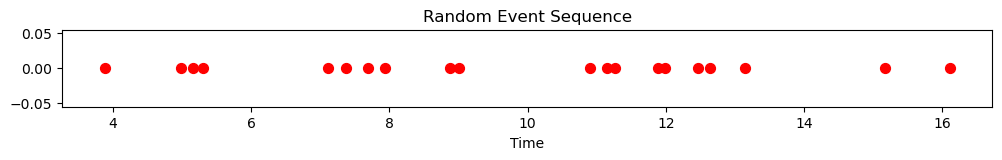

In [10]:
# Sample data
efirst = 10
elast = 30
tslice = times[efirst:elast]  # assuming times is your time data
yvals = np.zeros(len(tslice))  # dummy array of y-values

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 1))
ax.set_title("Random Event Sequence")
ax.set_xlabel("Time")

# Plot events using Matplotlib
ax.scatter(tslice, yvals, color="red", s=50)

# Show the Matplotlib plot
plt.show()

#### Make a histogram of the waiting times.

Next we can turn our array of the event times into an array of the gaps between successive events (the waiting times). Then we can make a histogram of this, using the numpy histogram routine. Note that we use density=True, which makes the output values normalised probability density, rather than counts per bin. (You could do the same thing manually if you divide the counts by the total number of events, to get probability per bin, and also divide by the binsize, to get probability per unit time. Note however, that np.histogram doesn't always make uniformly spaced bins...)

In [18]:
ngaps=nhits-1
tgaps=np.zeros(ngaps) # initialise the array of gap times

for i in range(0,ngaps):
    tgaps[i]=times[i+1]-times[i]

nbins=20 # number of bins in histogram
# note that numpy histogram routine outputs two arrays 
# the bin edges and the counts in each bin
hist,edges=np.histogram(tgaps,nbins,density=True) 

# get bin centres from the bin edges
bincens=np.zeros(nbins)
for i in range(0,nbins):
    bincens[i]=edges[i]+(edges[i+1]-edges[i])/2.0
    

#### Compare to theoretical distribution

According to the theory, the probability density per unit time it should follow 

$$f(t) = \lambda e^{-\lambda t}$$. 

We can try plotting that curve over the top of our histogram of simulated waiting tmes, and see if it works.

In [19]:
# now make the theoretical curve

gmax=np.max(tgaps)
deltplot=0.01
delyy=1.0
tcurve=np.arange(0.0,gmax,deltplot)
ycurve=np.zeros(len(tcurve))

for i in range(0,len(tcurve)):
    ycurve[i]=lamda*exp(-lamda*tcurve[i])


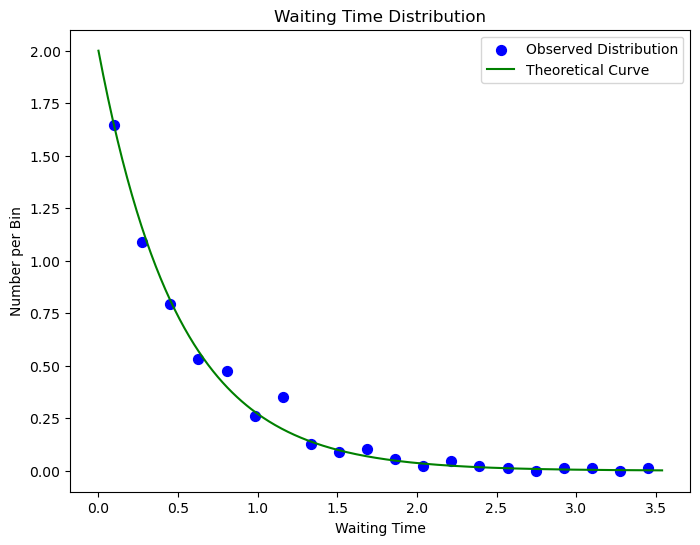

In [27]:
# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Waiting Time Distribution")
ax.set_xlabel("Waiting Time")
ax.set_ylabel("Number per Bin")

# Plot observed distribution using Matplotlib
ax.scatter(bincens, hist, color="blue", s=50, label='Observed Distribution')

# Plot theoretical curve using Matplotlib
ax.plot(tcurve, ycurve, color='green', label='Theoretical Curve')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()



We know the relationship is exponential, so plot it on a log scale to reveal the straight line

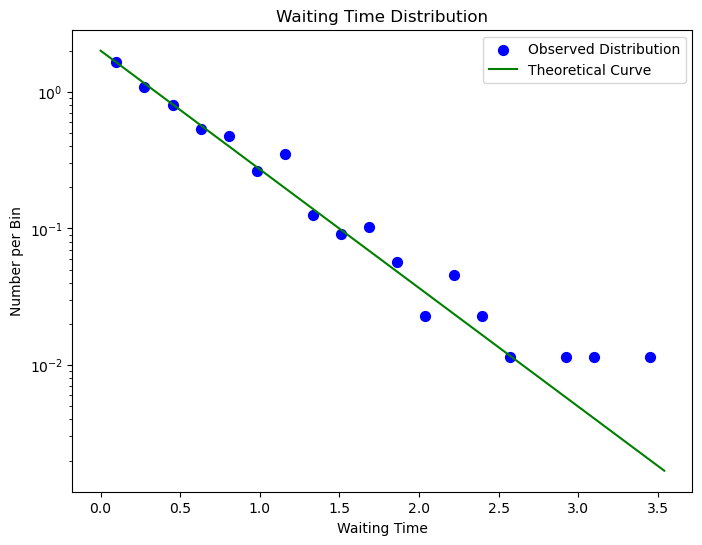

In [30]:
# Set y-axis to log scale

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Waiting Time Distribution")
ax.set_xlabel("Waiting Time")
ax.set_ylabel("Number per Bin")

# Plot observed distribution using Matplotlib
ax.scatter(bincens, hist, color="blue", s=50, label='Observed Distribution')

# Plot theoretical curve using Matplotlib
ax.plot(tcurve, ycurve, color='green', label='Theoretical Curve')

# Show legend
ax.legend()
ax.set_yscale('log')
plt.show()

#### Explore

Go back to near the beginning and try increasing nhits. This will make the notebook run more slowly, but the agreement with the curve will get better.

#### Exercise

You could also try binning up the counts in a larger binsize $T$. The number of counts per bin  will vary from bin to bin, but should follow a Poisson distribution. Try checking if this is true.